In [33]:
# for data manipulation
import pandas as pd
import numpy as np

#for graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#models to run
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#train_test_split
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit, GridSearchCV

#metrics
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
from sklearn.metrics import accuracy_score, roc_auc_score


In [3]:
# read raw data

raw_df_col = pd.read_csv("kddcup.names.txt", sep = ':')
col_names = raw_df_col.iloc[:,0]
raw_df = pd.read_csv("kddcup.data_10_percent.txt", header = None,names = col_names)
raw_df = raw_df.reset_index()


In [4]:
raw_df.head()

,index,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
# remove ". " from labels

raw_df['label'] = raw_df['label'].apply(lambda x: x[:-1])

In [6]:
unique_df = raw_df.drop_duplicates()
unique_df.shape

(145585, 42)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

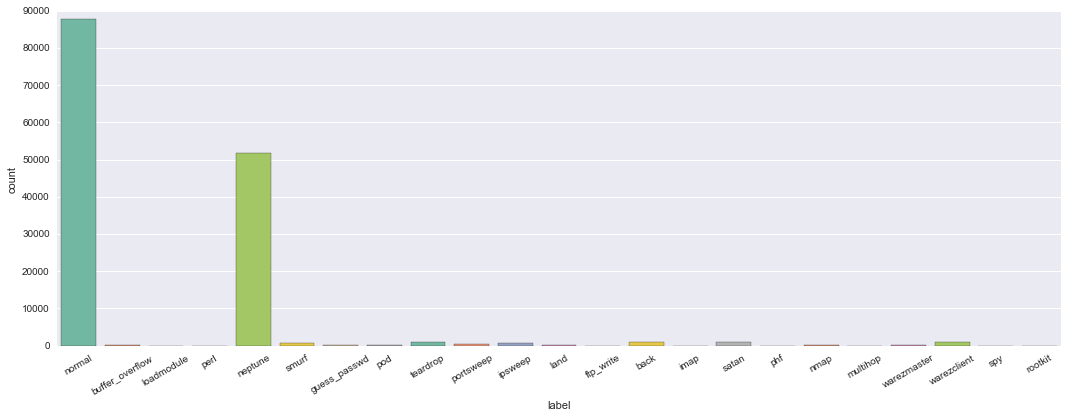

In [7]:
# distribution of labels

sns.set_color_codes()

fig, ax1 = plt.subplots(1,1, figsize = (18,6))

sns.countplot('label', data = unique_df,palette="Set2", ax = ax1)
plt.xticks(rotation=30)

In [8]:
# combining labels as normal and attack
# normal is 1 , attack is 0

def label_grouping(label):
    if label == 'normal':
        return 'normal'
    else:
        return 'attack'

unique_df['label_attack_type']= unique_df['label'].apply(label_grouping)
print(unique_df['label_attack_type'].head())
unique_df['label_attack_type'].value_counts()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: label_attack_type, dtype: object


/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


normal    87831
attack    57754
Name: label_attack_type, dtype: int64

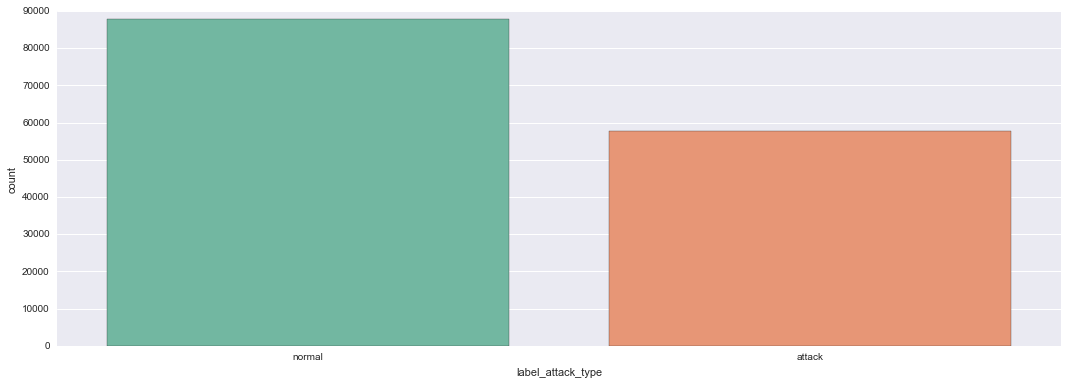

In [9]:
# distribution of label_attack_type

fig, ax1 = plt.subplots(1,1, figsize = (18,6))

sns.countplot('label_attack_type', data = unique_df,palette="Set2", ax = ax1)
# plt.xticks(rotation=30)

In [10]:
unique_df.columns

Index(['index', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label',
       'label_attack_type'],
      dtype='object')

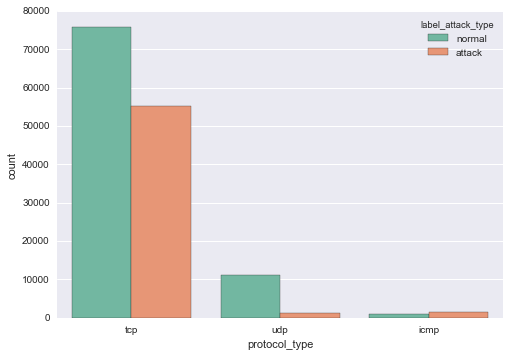

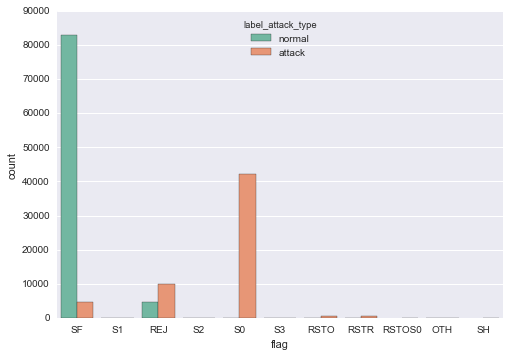

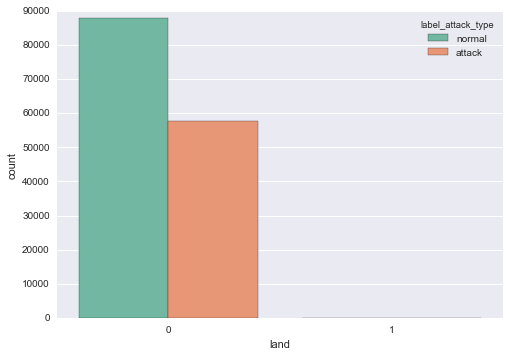

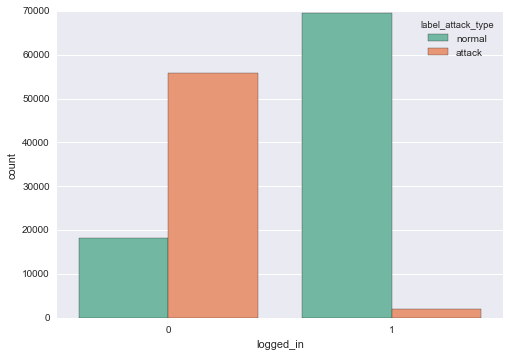

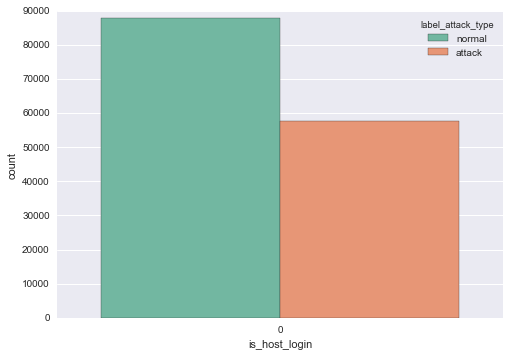

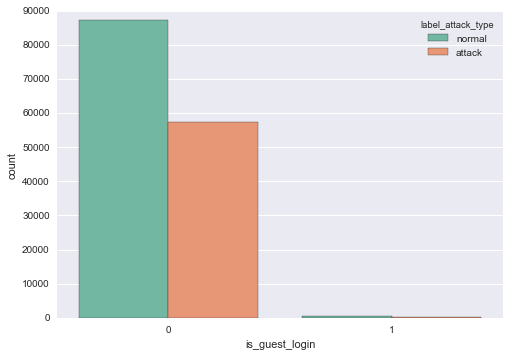

In [11]:
# distribution of categorical variables with 'label_attack_type'

sns.set()

categorical_cols = ['protocol_type','flag','land','logged_in','is_host_login','is_guest_login']

for i,col in enumerate(categorical_cols):
    plt.figure()
    sns.countplot(x=col, hue="label_attack_type",data=unique_df, palette="Set2")
#     plt.savefig('{0}.pdf'.format(i))

/usr/local/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


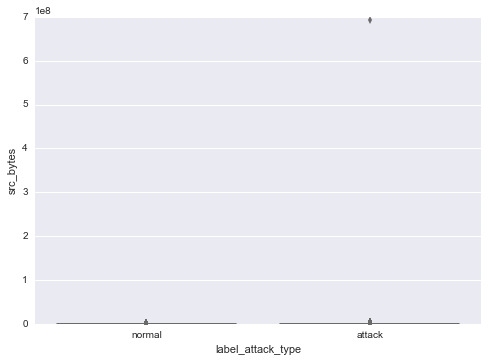

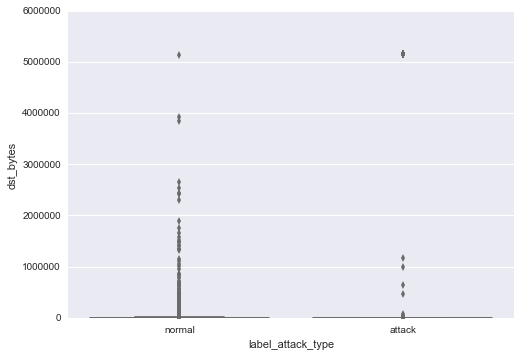

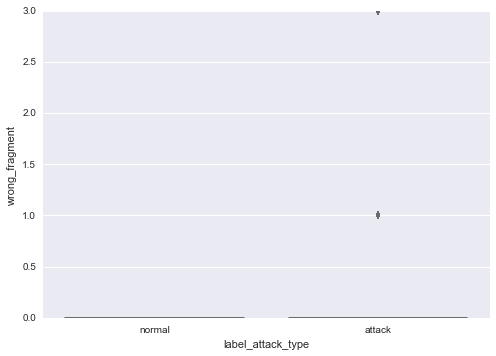

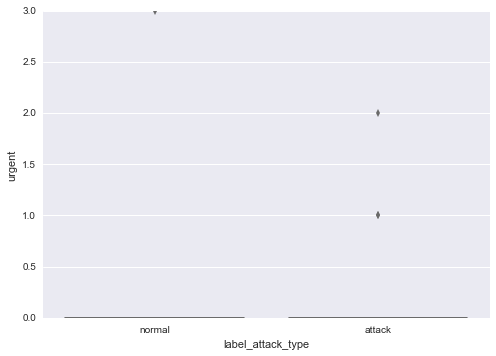

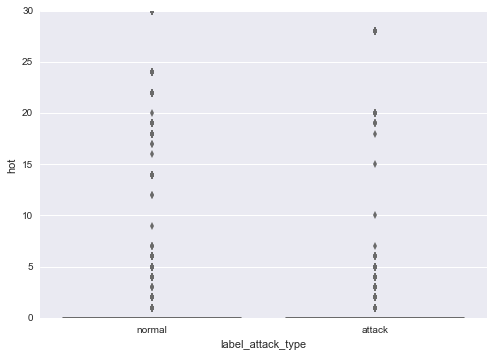

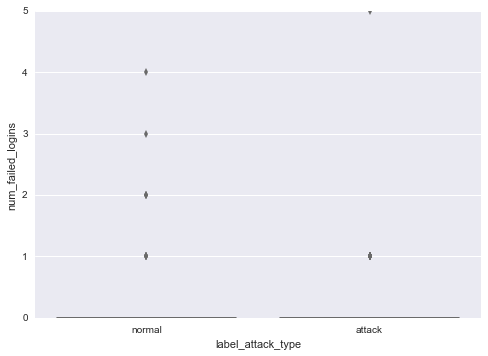

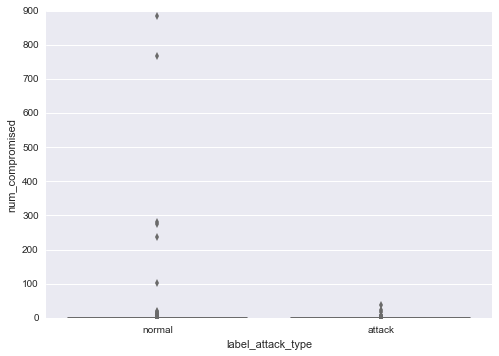

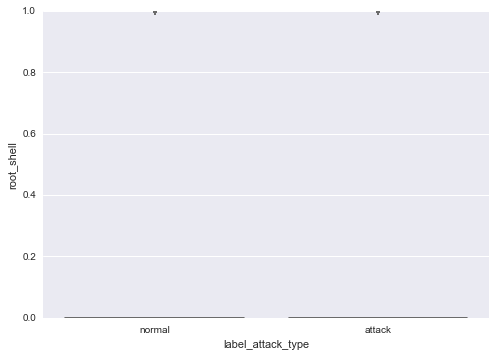

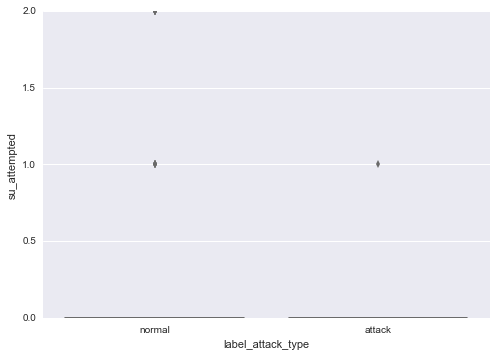

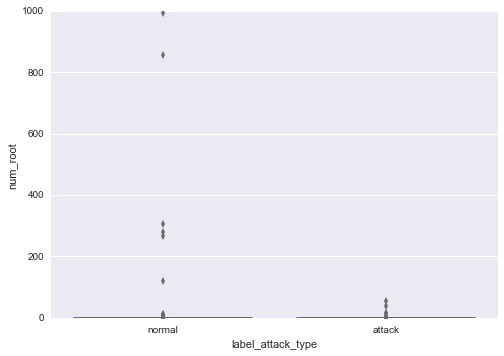

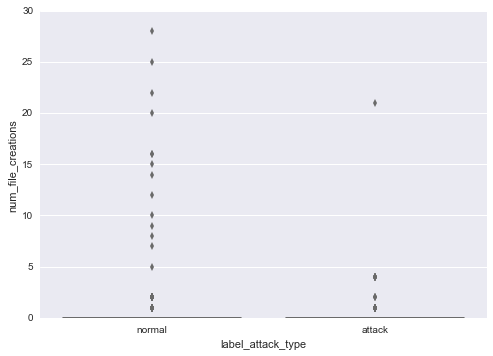

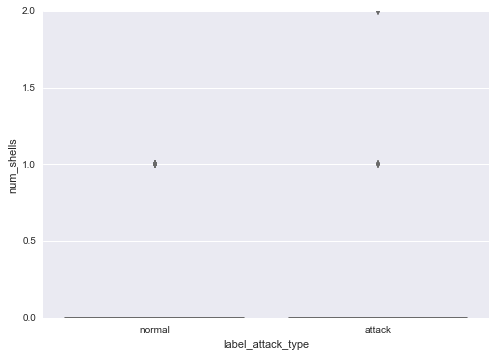

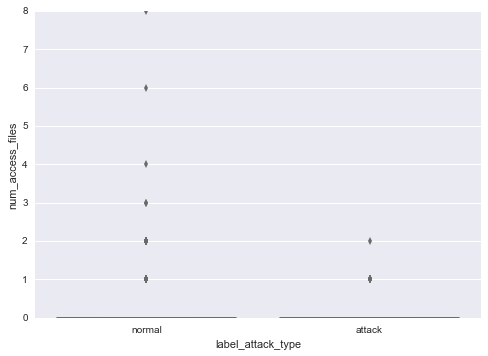

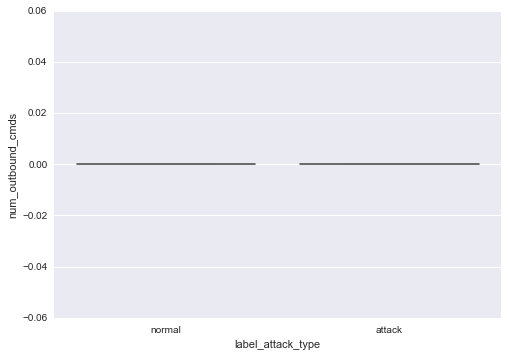

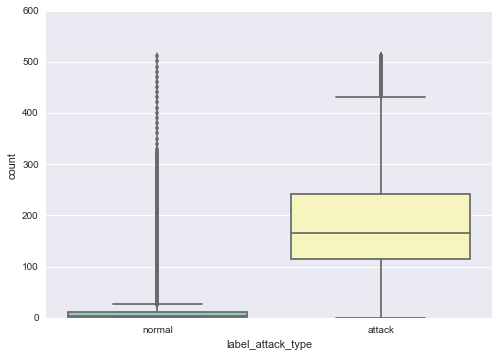

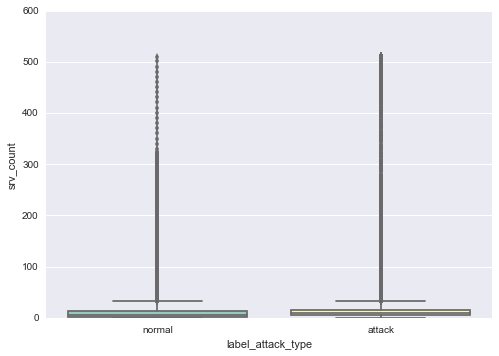

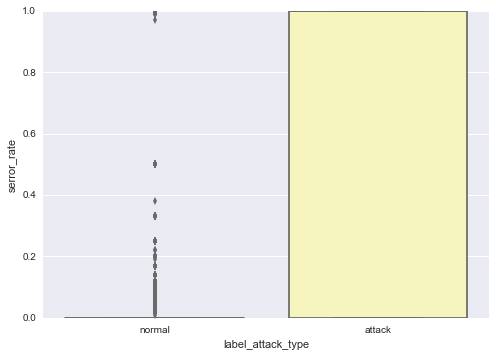

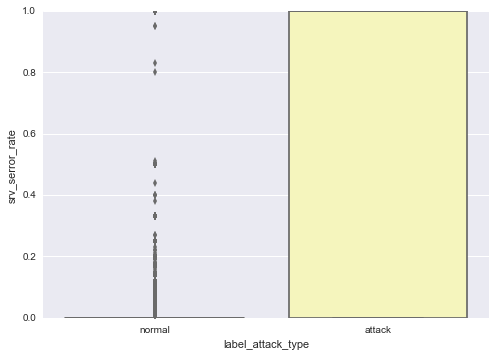

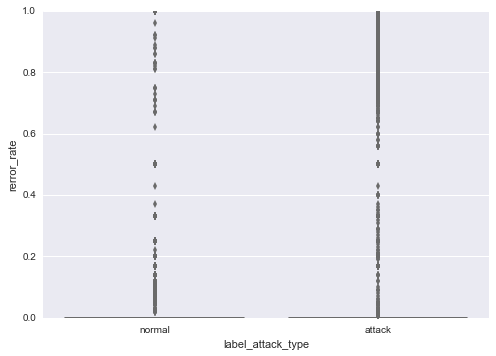

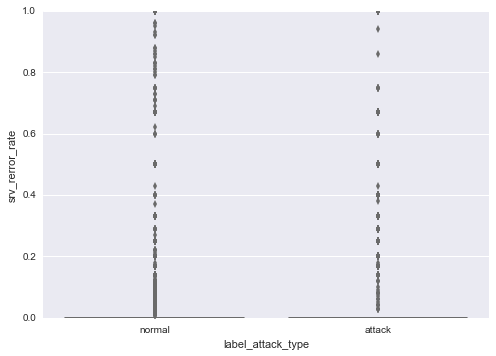

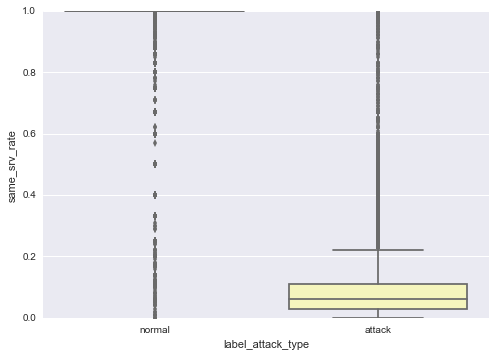

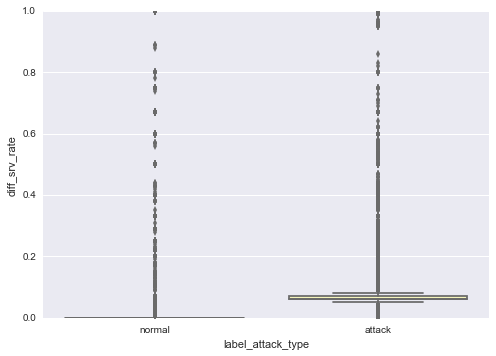

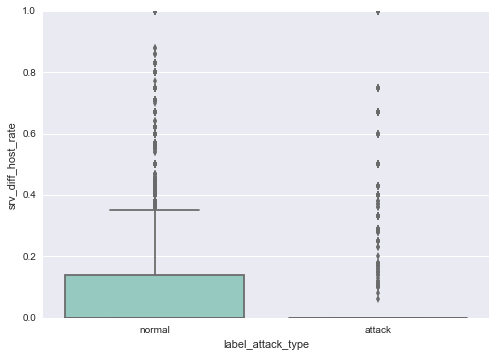

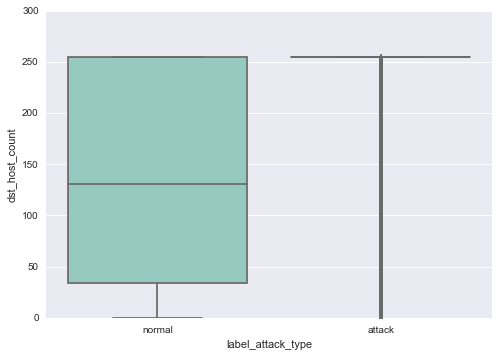

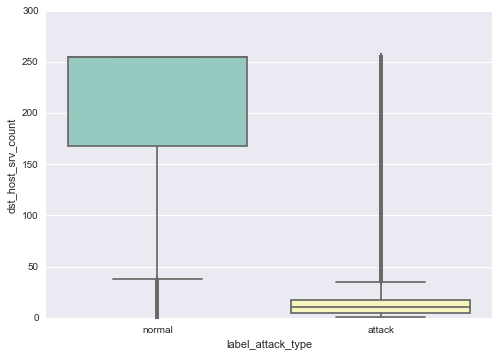

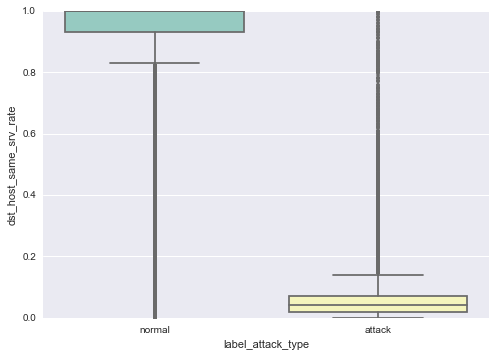

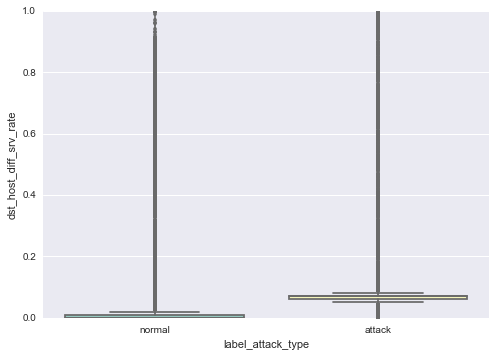

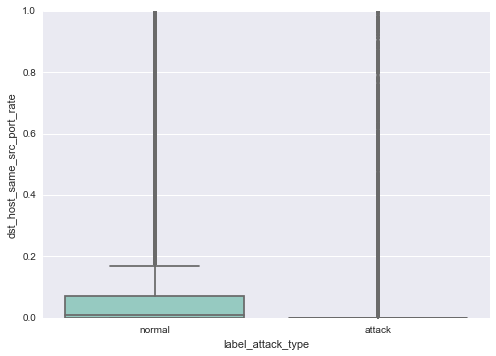

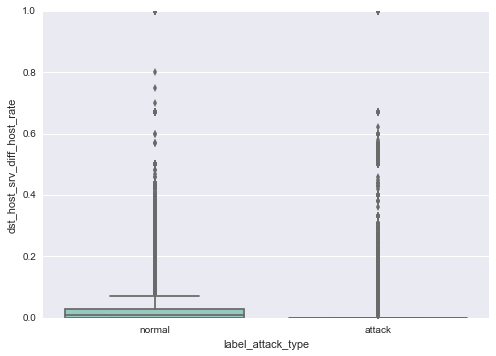

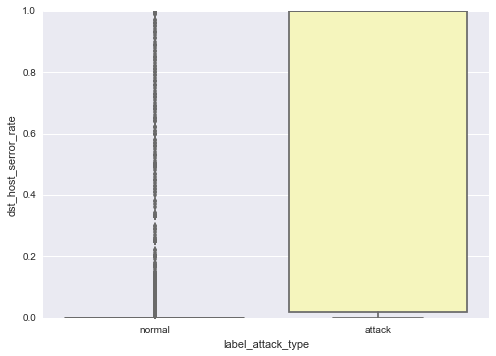

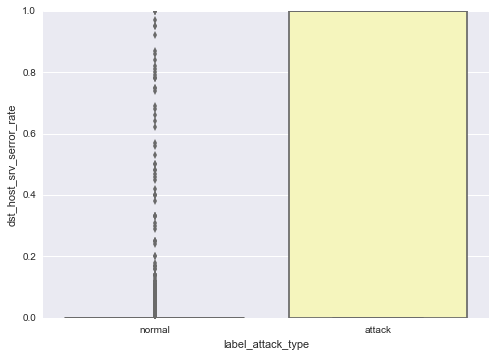

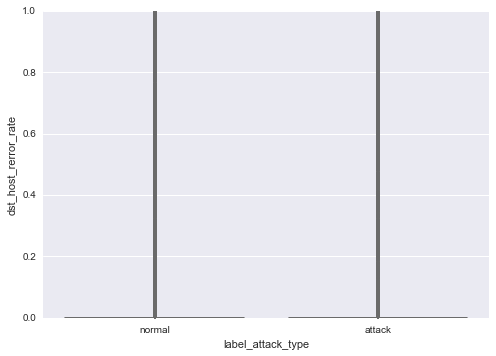

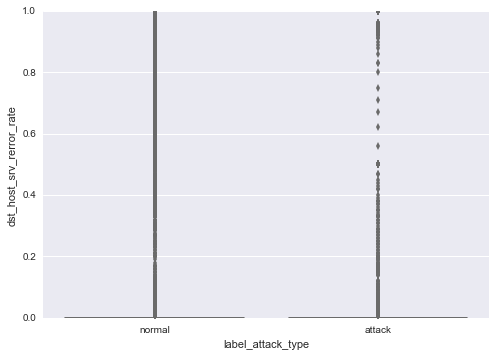

In [12]:
## Checking distributions of continuous variables with default_status by plotting boxplots
for i,col in enumerate(unique_df.columns):
    if col not in categorical_cols+['index','service','label','label_attack_type']:
        plt.figure()
        sns.boxplot(x="label_attack_type", y=col,data=unique_df , palette = "Set3")
#         plt.savefig('{0}.pdf'.format(i))

##### Attack is 0 (negative), normal is 1(positive)

In [13]:
# converting label_attack_type to 0 and 1

unique_df.loc[unique_df['label_attack_type'] == 'normal', 'final_label'] = 1
unique_df.loc[unique_df['label_attack_type'] == 'attack', 'final_label'] = 0

/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
#one hot encoding of categorical variables

temp1 = pd.get_dummies(unique_df['flag'],prefix = 'flag')
temp2 = pd.get_dummies(unique_df['service'],prefix = 'service')
temp3 = pd.get_dummies(unique_df['protocol_type'],prefix = 'protocol')

# concat with blm dataframe

unique_df = pd.concat([unique_df, temp1,temp2,temp3], axis =1 )


In [15]:
unique_df.head()

,index,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,protocol_icmp,protocol_tcp,protocol_udp
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
# Usual way of splitting data into test and train

# idx = int(unique_df.shape[0]* 0.70)
# train = unique_df[:idx]
# test = unique_df[idx:]

#### Stratified Sampling

In [17]:
# split into train and test datasets

predictors = [c for c in unique_df.columns if c not in ['label', 'label_attack_type', 'index', 'protocol_type',
                                                   'flag','service','is_host_login','final_label']]

X = unique_df[predictors]
y = unique_df['final_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3, stratify = y)

In [18]:
print(y_test.value_counts())

1.0    26350
0.0    17326
Name: final_label, dtype: int64


In [19]:
print(y_train.value_counts())

1.0    61481
0.0    40428
Name: final_label, dtype: int64


### Naive Bayes

In [20]:
# create instance of Naive Bayes model

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [21]:
#making predictions

predictions_nb = nb.predict(X_test)

###### Metrics - Accuracy, precision, recall, F1 score, Confusion matrix, roc_auc 

In [22]:
# Accuracy

acc_nb = accuracy_score(y_test,predictions_nb)
print("Accuracy is ", acc_nb)

# precision, recall, f1 score

pr_nb, re_nb, f1_nb, s = precision_recall_fscore_support(y_test,predictions_nb)
print('Precision for each class is ', pr_nb)
print('Recall/sensitivity for each class is ', re_nb)
print('F1 Score for each class is ', f1_nb)

# roc_auc

roc_auc_nb = roc_auc_score(y_test,predictions_nb)
print('AUC-ROC score is ', roc_auc_nb)

# confusion matrix

confusion_nb = confusion_matrix(y_test,predictions_nb)
print('confusion matrix is :-->')
print(confusion_nb)

Accuracy is  0.771751076106
Precision for each class is  [ 0.99105593  0.7263507 ]
Recall/sensitivity for each class is  [ 0.42848898  0.99745731]
F1 Score for each class is  [ 0.59829955  0.84058527]
AUC-ROC score is  0.712973140804
confusion matrix is :-->
[[ 7424  9902]
 [   67 26283]]


### Logistic Regression

In [23]:
# create instance of logistic model

lg = LogisticRegression(random_state = 3)
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=3, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
#making predictions

predictions_lg = lg.predict(X_test)

###### Metrics - Accuracy, precision, recall, F1 score, Confusion matrix, roc_auc 

In [25]:
# Accuracy

acc_lg = accuracy_score(y_test,predictions_lg)
print("Accuracy is ", acc_lg)

# precision, recall, f1 score

pr_lg, re_lg, f1_lg, s = precision_recall_fscore_support(y_test,predictions_lg)
print('Precision for each class is ', pr_lg)
print('Recall/sensitivity for each class is ', re_lg)
print('F1 Score for each class is ', f1_lg)

# roc_auc

roc_auc_lg = roc_auc_score(y_test,predictions_lg)
print('AUC-ROC score is ', roc_auc_lg)

# confusion matrix

confusion_lg = confusion_matrix(y_test,predictions_lg)
print('confusion matrix is :-->')
print(confusion_lg)

Accuracy is  0.931861892115
Precision for each class is  [ 0.88872034  0.96343881]
Recall/sensitivity for each class is  [ 0.94678518  0.92204934]
F1 Score for each class is  [ 0.91683434  0.94228979]
AUC-ROC score is  0.934417257104
confusion matrix is :-->
[[16404   922]
 [ 2054 24296]]


##### Hyperparameter tuning - using GridSearchCV

In [34]:
# choose set of parameters to tune

params = {  'C' : [0.001, 0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'], 
            'fit_intercept': [True, False]}

# create instance of GridSearch and fit the data

grid = GridSearchCV(estimator = lg, param_grid = params)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=3, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'fit_intercept': [True, False], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [35]:
# evaluate the best grid searched model on the testing data

acc = grid.score(X_test, y_test)
print('Grid Search Accuracy is {0}'.format(acc))

print("grid search best parameters: {}".format(grid.best_params_))

Grid Search Accuracy is 0.9936120523857496
grid search best parameters: {'C': 1, 'fit_intercept': True, 'penalty': 'l1'}


### Decision Tree

In [26]:
#create instance of decision tree

dt = DecisionTreeClassifier(random_state = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=3, splitter='best')

In [27]:
#making predictions

predictions_dt = dt.predict(X_test)

In [28]:
# Accuracy

acc_dt = accuracy_score(y_test,predictions_dt)
print("Accuracy is ", acc_dt)

# precision, recall, f1 score

pr_dt, re_dt, f1_dt, s = precision_recall_fscore_support(y_test,predictions_dt)
print('Precision for each class is ', pr_dt)
print('Recall/sensitivity for each class is ', re_dt)
print('F1 Score for each class is ', f1_dt)

# roc_auc

roc_auc_dt = roc_auc_score(y_test,predictions_dt)
print('AUC-ROC score is ', roc_auc_dt)

# confusion matrix

confusion_dt = confusion_matrix(y_test,predictions_dt)
print('confusion matrix is :-->')
print(confusion_dt)

Accuracy is  0.99942760326
Precision for each class is  [ 0.99896176  0.99973423]
Recall/sensitivity for each class is  [ 0.99959598  0.99931689]
F1 Score for each class is  [ 0.99927877  0.99952552]
AUC-ROC score is  0.999456435481
confusion matrix is :-->
[[17319     7]
 [   18 26332]]


### Random Forest Model

In [29]:
#create instance of random forest model

rfc = RandomForestClassifier(n_estimators=500,n_jobs = -1, random_state=3)

In [30]:
# fitting data to random forest model

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=3,
            verbose=0, warm_start=False)

In [31]:
# predictions

predictions_rfc = rfc.predict(X_test)

In [32]:
# Accuracy

acc_dt = accuracy_score(y_test,predictions_rfc)
print("Accuracy is ", acc_lg)

# precision, recall, f1 score

pr_rfc, re_rfc, f1_rfc, s = precision_recall_fscore_support(y_test,predictions_rfc)
print('Precision for each class is ', pr_rfc)
print('Recall/sensitivity for each class is ', re_rfc)
print('F1 Score for each class is ', f1_rfc)

# roc_auc

roc_auc_rfc = roc_auc_score(y_test,predictions_rfc)
print('AUC-ROC score is ', roc_auc_rfc)

# confusion matrix

confusion_rfc = confusion_matrix(y_test,predictions_rfc)
print('confusion matrix is :-->')
print(confusion_rfc)

Accuracy is  0.931861892115
Precision for each class is  [ 0.99959584  0.99950675]
Recall/sensitivity for each class is  [ 0.99924968  0.99973435]
F1 Score for each class is  [ 0.99942273  0.99962054]
AUC-ROC score is  0.999492013955
confusion matrix is :-->
[[17313    13]
 [    7 26343]]
